In [1]:
import pandas as pd
import numpy as np
import requests
from bs4 import Comment
from bs4 import BeautifulSoup as bf
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
import time
from selenium.webdriver.common.by import By
options = Options()
options.add_argument("--headless")
options.add_argument("start-maximized")
from datetime import datetime

This project has several steps...

First, there are some discusting Web Scraping need to be done.....

Involving scrapping data from several HTML tables....

Which, these tables don't even have a id or class associate with them

-.   -

Anyways, after I get all the data I want, I would conduct some data preprocessing and EDA via data visualization

Let\'s see


I am extracting data from the website

"https://www.the-numbers.com/market/2023/top-grossing-movies"

it has a table that contains many valuable info about the top 107(? is that even necessary) movies of 2023 in terms of their Total Gross

I only look at TOP 10.

First of all, I would try to extract the URL associated with each movie title

Then Use the url to redirect me to the page where I could find the actual table that contains more detailed info about the movie(i.e., datetime info)

I am intended to create time series dataset so, I would need that info

# Data Collection

1. find all the tables in the page

In [11]:
with webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=options) as driver:
     driver.implicitly_wait(0.5) 
    #launch URL
     driver.get("https://www.the-numbers.com/market/2023/top-grossing-movies")
     time.sleep(1)
     # search = driver.find_element(By.XPATH,'//*[@id="box_office_chart"]/table')
     html_from_page = driver.page_source
     soup = bf(html_from_page, 'html.parser')
     table_soup = soup.find_all('table')

Luckily, we only have one in this page

Well, the worst is yet to come

In [ ]:
print(table_soup)

Yike, ugly

Let me get all the info I need, then run, never come back

In [ ]:
Distributor = []
for row1 in table_soup:
    toadd = row1.find('tbody').find_all('tr')
    for row2 in toadd[1:len(toadd)+1]:
        a = row2.find_all('td')
        b = [1,3]
        dic = {}
        if len(a) >=4:
          for idx,item in enumerate(map(a.__getitem__,b)):
           
            if idx == 0:
                temp_link = item.a.get('href').replace('summary','box-office')
                full_link= 'https://www.the-numbers.com' + temp_link
                dic['Movie_Title'] = full_link
            else:
                if item.a is not None:
                    
                    dic['Company_title'] = item.text
                    full_link = 'https://www.the-numbers.com' + item.a.get('href')
                    dic['Company_link'] = full_link
        
        Distributor.append(dic)

In [ ]:
Distributor_df = pd.DataFrame(Distributor)
Distributor_df.head(6)

Beatuiful, let me keep going

In [ ]:
Url_toadd = Distributor_df['Movie_Title'].dropna().tolist()

In [ ]:
Url_toadd

In [ ]:
len(Url_toadd)

So, we have 93 Urls to scrap, that is so not ganna happen

I got Urls, then we can start our actual task today


2. Scrap all data from that table we want for all top 10 movies

In [ ]:
# top ten movies data

for ind, url in enumerate(Url_toadd[0:10]):
     with webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=options) as driver:
          driver.implicitly_wait(0.5) 
     #launch URL
          driver.get(url)
          time.sleep(1)
          # search = driver.find_element(By.XPATH,'//*[@id="box_office_chart"]/table')
          html_from_page = driver.page_source
          soup = bf(html_from_page, 'html.parser')

          # get the title of this movie
          responses = soup.find_all('div', id="main")
          title = responses[0].find_all('h1')[0].text

          search = soup.find_all('div', id="box_office_chart")

          for idx,h in enumerate(search):
               if idx != 1:
                    continue
               else:

                    rows = h.find('table').find('tbody').find_all('tr')
                    
                    # create keys for dict
                    keylist = []
                    store_data = []

                    # for replacing
                    rep = {"\xa0": "", "$": "",",": "","%":""} # define desired replacements here
                    # # use these three lines to do the replacement
                    rep = dict((re.escape(k), v) for k, v in rep.items()) 
                    #Python 3 renamed dict.iteritems to dict.items so use rep.items() for latest versions
                    pattern = re.compile("|".join(rep.keys()))
                    
                    # go through all rows in the table

                    for ids,row in enumerate(rows):
                         dic = {'Title':title}
                         
                         # first row always the header
                         if ids == 0:
                              temp_list = row.find_all('th')
                              for ele in temp_list:
                                   if '\xa0' in ele.text:
                                        keylist.append(ele.text.replace('\xa0',' '))
                                   else:
                                        keylist.append(ele.text) 
                              continue

                         # we know that in total we have 9 columns
                         # need to clean a little bit

                         for  i in range(9):
                              temp = row.find_all('td')[i].text
                              text = pattern.sub(lambda m: rep[re.escape(m.group(0))], temp)
                              dic[keylist[i]] = text

                         store_data.append(dic)

                    df = pd.DataFrame(store_data)

              
     if ind == 0:
          table_1df =  df
     if ind == 1:
          table_2df = df
     if ind == 2:
          table_3df = df
     if ind == 3:
          table_4df = df
     if ind == 4:
          table_5df = df
     if ind == 5:
          table_6df = df
     if ind == 6:
          table_7df =  df
     if ind == 7:
          table_8df = df
     if ind == 8:
          table_9df = df
     if ind == 9:
          table_10df = df

# Data Structure

In [ ]:
print(table_1df.head(6))
print(table_2df.head(6))
print(table_3df.head(6))
print(table_4df.head(6))
print(table_5df.head(6))
print(table_6df.head(6))
print(table_7df.head(6))
print(table_8df.head(6))
print(table_9df.head(6))
print(table_10df.head(6))

In [ ]:
print(table_1df.shape)
print(table_2df.shape)
print(table_3df.shape)
print(table_4df.shape)
print(table_5df.shape)
print(table_6df.shape)
print(table_7df.shape)
print(table_8df.shape)
print(table_9df.shape)
print(table_10df.shape)

'date' looks ugly, let me change the format

In [ ]:
def change_date(row):
    temp_date = str(datetime.strptime(row, '%b %d %Y'))
    return 'T'.join(temp_date.split(' '))+'Z'

In [ ]:
table_1df['Date'] = table_1df['Date'].map(lambda x:change_date(x))
table_2df['Date'] = table_2df['Date'].map(lambda x:change_date(x))
table_3df['Date'] = table_3df['Date'].map(lambda x:change_date(x))
table_4df['Date'] = table_4df['Date'].map(lambda x:change_date(x))
table_5df['Date'] = table_5df['Date'].map(lambda x:change_date(x))
table_6df['Date'] = table_6df['Date'].map(lambda x:change_date(x))
table_7df['Date'] = table_7df['Date'].map(lambda x:change_date(x))
table_8df['Date'] = table_8df['Date'].map(lambda x:change_date(x))
table_9df['Date'] = table_9df['Date'].map(lambda x:change_date(x))
table_10df['Date'] = table_10df['Date'].map(lambda x:change_date(x))

Take a look at

In [ ]:
print(table_1df.head(6))
print(table_2df.head(6))
print(table_3df.head(6))
print(table_4df.head(6))
print(table_5df.head(6))
print(table_6df.head(6))
print(table_7df.head(6))
print(table_8df.head(6))
print(table_9df.head(6))
print(table_10df.head(6))

In [ ]:
table_1df.dtypes

Not likeing these dtypes, object is so useless, want to change them!

In [ ]:
string_col = ['Title','Date','Rank','%YD','%LW','Theaters']
numer_col = ['Gross','Per Theater','Total Gross','Days']

In [ ]:
table_1df[string_col] = table_1df[string_col].astype("string")
table_1df[numer_col] = table_1df[numer_col].apply(pd.to_numeric)

table_2df[string_col] = table_2df[string_col].astype("string")
table_2df[numer_col] = table_2df[numer_col].apply(pd.to_numeric)

table_3df[string_col] = table_3df[string_col].astype("string")
table_3df[numer_col] = table_3df[numer_col].apply(pd.to_numeric)

table_4df[string_col] = table_4df[string_col].astype("string")
table_4df[numer_col] = table_4df[numer_col].apply(pd.to_numeric)

table_5df[string_col] = table_5df[string_col].astype("string")
table_5df[numer_col] = table_5df[numer_col].apply(pd.to_numeric)

table_6df[string_col] = table_6df[string_col].astype("string")
table_6df[numer_col] = table_6df[numer_col].apply(pd.to_numeric)

table_7df[string_col] = table_7df[string_col].astype("string")
table_7df[numer_col] = table_7df[numer_col].apply(pd.to_numeric)

table_8df[string_col] = table_8df[string_col].astype("string")
table_8df[numer_col] = table_8df[numer_col].apply(pd.to_numeric)

table_9df[string_col] = table_9df[string_col].astype("string")
table_9df[numer_col] = table_9df[numer_col].apply(pd.to_numeric)

table_10df[string_col] = table_10df[string_col].astype("string")
table_10df[numer_col] = table_10df[numer_col].apply(pd.to_numeric)

In [ ]:
Combined_df = pd.concat([table_1df, table_2df,table_3df,table_4df,table_5df, 
                                       table_6df,table_7df,table_8df,table_9df, table_10df],axis=0, ignore_index=True)
print(Combined_df.shape)

In [ ]:
Combined_df.to_csv('Total_Movie_info.csv',index=False)

Good, the part 1 is finished!!

^^

In [2]:
Total_Movie_info = pd.read_csv("Total_Movie_info.csv")

In [3]:
Total_Movie_info.columns

Index(['Title', 'Date', 'Rank', 'Gross', '%YD', '%LW', 'Theaters',
       'Per Theater', 'Total Gross', 'Days'],
      dtype='object')

In [7]:
Total_Movie_info["Date"] =Total_Movie_info["Date"].str.replace("T00:00:00Z","")

In [8]:
Total_Movie_info["Date"]

0      2022-12-15
1      2022-12-16
2      2022-12-17
3      2022-12-18
4      2022-12-19
          ...    
413    2023-02-11
414    2023-02-12
415    2023-02-13
416    2023-02-14
417    2023-02-15
Name: Date, Length: 418, dtype: object

# Data PreProcessing

I need to create a subset of the original dataframe for a better use later

In [ ]:
Series_Data = Total_Movie_info[['Title', 'Date', 'Total Gross']]
# Series_Data['Date'].apply(lambda x: datetime(int(str(x).split('-'))))
# Series_Data['Date'] = pd.Series(pd.DatetimeIndex((Series_Data['Date']).tz_localize(None))

Have to make them as 'Datetime', and set to index

In [25]:
Series_Data['Date'] = pd.to_datetime(Series_Data['Date'])

C:\Users\ancho\AppData\Local\Temp\ipykernel_35500\2674812520.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Series_Data['Date'] = pd.to_datetime(Series_Data['Date'])


In [26]:
Series_Data.dtypes

Title                  object
Date           datetime64[ns]
Total Gross             int64
dtype: object

In [27]:
Series_Data = Series_Data.set_index('Date')
Series_Data.index

DatetimeIndex(['2022-12-15', '2022-12-16', '2022-12-17', '2022-12-18',
               '2022-12-19', '2022-12-20', '2022-12-21', '2022-12-22',
               '2022-12-23', '2022-12-24',
               ...
               '2023-02-06', '2023-02-07', '2023-02-08', '2023-02-09',
               '2023-02-10', '2023-02-11', '2023-02-12', '2023-02-13',
               '2023-02-14', '2023-02-15'],
              dtype='datetime64[ns]', name='Date', length=418, freq=None)

Good, finished this step

In [28]:
Series_Data

,Title,Total Gross
Date,,
2022-12-15,Avatar: The Way of Water (2022),17000000
2022-12-16,Avatar: The Way of Water (2022),53200270
2022-12-17,Avatar: The Way of Water (2022),97528157
2022-12-18,Avatar: The Way of Water (2022),134100226
2022-12-19,Avatar: The Way of Water (2022),150357304
...,...,...
2023-02-11,Black Panther: Wakanda Forever (2022),453609089
2023-02-12,Black Panther: Wakanda Forever (2022),453626325
2023-02-13,Black Panther: Wakanda Forever (2022),453635012


In [35]:
# str(Series_Data["Title"].unique()[0]).__repr__()[0:]

str(Series_Data["Title"].unique()[0])

"'Avatar: The Way of Water (2022)'"

In [43]:
'Avatar: The Way of Water (2022)'.__repr__()[1:-1]

'Avatar: The Way of Water (2022)'

In [45]:
'Title == ' + ''.join(('"', 'Avatar: The Way of Water (2022)'.__repr__()[1:-1], '"'))

'Title == "Avatar: The Way of Water (2022)"'

In [47]:
all_res = []

for name in Series_Data["Title"].unique():

    para = 'Title == ' + ''.join(('"', name.__repr__()[1:-1], '"'))

    data = Series_Data.query(para)["Total Gross"]
    data = data.to_frame(name = name)
    all_res.append(data)
    

In [48]:
len(all_res)

10

In [50]:
all_Movie_Series = pd.concat(all_res, axis = 1)

In [51]:
all_Movie_Series.shape

(98, 10)

# EDA

In [54]:
import matplotlib.pyplot as plt
import plotly.express as px
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
plt.style.use('fivethirtyeight')

<AxesSubplot:xlabel='Date'>

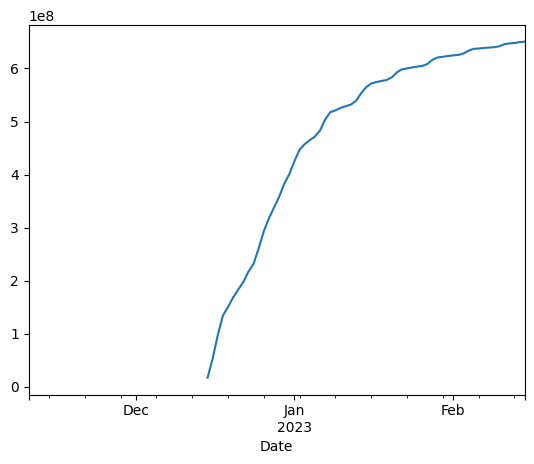

In [53]:
all_Movie_Series.iloc[:,0].plot()

In [57]:
px.data.stocks(indexed=True)-1

company,GOOG,AAPL,AMZN,FB,NFLX,MSFT
date,,,,,,
2018-01-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2018-01-08,0.018172,0.011943,0.061881,-0.040032,0.053526,0.015988
2018-01-15,0.032008,0.019771,0.053240,-0.029757,0.049860,0.020524
2018-01-22,0.066783,-0.019943,0.140676,0.016858,0.307681,0.066561
2018-01-29,0.008773,-0.082857,0.163374,0.018357,0.273537,0.040708
...,...,...,...,...,...,...
2019-12-02,0.216280,0.546914,0.425061,0.075997,0.463641,0.720717
2019-12-09,0.222821,0.572286,0.432660,0.038855,0.421496,0.752239
2019-12-16,0.224418,0.596800,0.453455,0.104094,0.604362,0.784896


In [59]:
all_Movie_Series.columns

Index(['Avatar: The Way of Water (2022)',
       'Puss in Boots: The Last Wish (2022)', 'M3GAN (2022)',
       'A Man Called Otto (2022)', 'Plane (2023)', '80 for Brady (2023)',
       'Missing (2023)', 'Knock at the Cabin (2023)', 'Pathaan (2023)',
       'Black Panther: Wakanda Forever (2022)'],
      dtype='object')

In [65]:
all_Movie_Series

,Avatar: The Way of Water (2022),Puss in Boots: The Last Wish (2022),M3GAN (2022),A Man Called Otto (2022),Plane (2023),80 for Brady (2023),Missing (2023),Knock at the Cabin (2023),Pathaan (2023),Black Panther: Wakanda Forever (2022)
Date,,,,,,,,,,
2022-11-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28000000
2022-11-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84285721
2022-11-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,140416772
2022-11-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,181339761
2022-11-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,192465260
...,...,...,...,...,...,...,...,...,...,...
2023-02-11,645634074.0,157300665.0,90496695.0,56931261.0,30584957.0,23643636.0,26118676.0,22462520.0,15701581.0,453609089
2023-02-12,647253626.0,158574970.0,90969690.0,57382628.0,30789249.0,24769963.0,26578269.0,23371675.0,15939604.0,453626325
2023-02-13,647943867.0,158996875.0,91180985.0,57680797.0,30925877.0,25543663.0,26814924.0,23936625.0,NaN,453635012


For px plotting, we need a dataframe with a categorical data

So I create a temporary df just to try out this ploting function

In [67]:
df =Total_Movie_info[["Title","Date","Total Gross"]]
df["Date"] = pd.to_datetime(df["Date"])
df = df.set_index('Date')
df.index


C:\Users\ancho\AppData\Local\Temp\ipykernel_35500\2434658599.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



DatetimeIndex(['2022-12-15', '2022-12-16', '2022-12-17', '2022-12-18',
               '2022-12-19', '2022-12-20', '2022-12-21', '2022-12-22',
               '2022-12-23', '2022-12-24',
               ...
               '2023-02-06', '2023-02-07', '2023-02-08', '2023-02-09',
               '2023-02-10', '2023-02-11', '2023-02-12', '2023-02-13',
               '2023-02-14', '2023-02-15'],
              dtype='datetime64[ns]', name='Date', length=418, freq=None)

In [69]:
df["Title"] = df["Title"].astype("category")

In [70]:
df.dtypes

Title          category
Total Gross       int64
dtype: object

In [71]:
df

,Title,Total Gross
Date,,
2022-12-15,Avatar: The Way of Water (2022),17000000
2022-12-16,Avatar: The Way of Water (2022),53200270
2022-12-17,Avatar: The Way of Water (2022),97528157
2022-12-18,Avatar: The Way of Water (2022),134100226
2022-12-19,Avatar: The Way of Water (2022),150357304
...,...,...
2023-02-11,Black Panther: Wakanda Forever (2022),453609089
2023-02-12,Black Panther: Wakanda Forever (2022),453626325
2023-02-13,Black Panther: Wakanda Forever (2022),453635012


In [77]:
fig = px.area(df,x=df.index, y=df["Total Gross"], facet_col="Title", facet_col_wrap=2)
fig.show()

Well, I am confused, where is my categorical variable??

Anyways, let me stick with the orginal dataframe that is full with series data

In [87]:
px.line(all_Movie_Series, x=all_Movie_Series.index, y=all_Movie_Series.columns,
              title='Total Gross Trend')

In [ ]:
# https://plotly.com/python/time-series/

In [91]:
all_Movie_Series.tail(6)

,Avatar: The Way of Water (2022),Puss in Boots: The Last Wish (2022),M3GAN (2022),A Man Called Otto (2022),Plane (2023),80 for Brady (2023),Missing (2023),Knock at the Cabin (2023),Pathaan (2023),Black Panther: Wakanda Forever (2022)
Date,,,,,,,,,,
2023-02-10,641752310.0,154315620.0,89207805.0,55580477.0,29937162.0,20818918.0,24737949.0,19644115.0,15225450.0,453565711
2023-02-11,645634074.0,157300665.0,90496695.0,56931261.0,30584957.0,23643636.0,26118676.0,22462520.0,15701581.0,453609089
2023-02-12,647253626.0,158574970.0,90969690.0,57382628.0,30789249.0,24769963.0,26578269.0,23371675.0,15939604.0,453626325
2023-02-13,647943867.0,158996875.0,91180985.0,57680797.0,30925877.0,25543663.0,26814924.0,23936625.0,NaN,453635012
2023-02-14,649743145.0,160129695.0,91806980.0,58522410.0,31297898.0,27208581.0,27589411.0,25524085.0,NaN,453655046
2023-02-15,650432427.0,160502835.0,91989440.0,58810223.0,31405836.0,27995729.0,27809566.0,26031180.0,NaN,453663669


Seems like at 2023 Feb 12, it is the earliest update of Total Gross for all movies we have in here

Then Let me visualize it

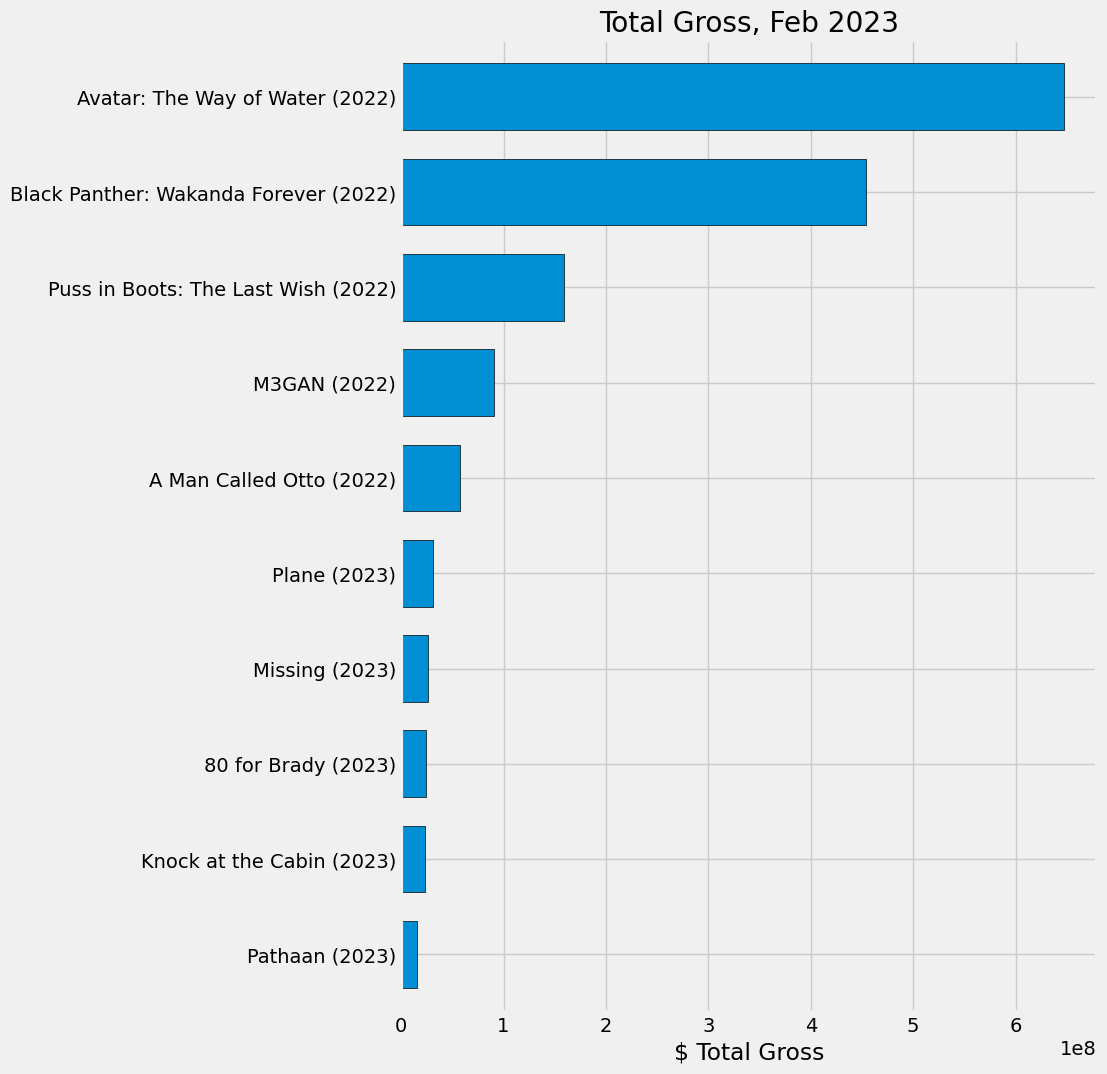

In [92]:
# Make a horizontal bar plot
ax = all_Movie_Series.loc[all_Movie_Series.index == '2023-02-12'].T \
    .sort_values('2023-02-12') \
    .plot(kind = 'barh',figsize=(8,12),width = 0.7, edgecolor = 'black',
          title = 'Total Gross, Feb 2023')

ax.legend().remove()
ax.set_xlabel('$ Total Gross')
plt.show()